**Red Wine analysis**

*First let's vizualise the data:*

In [54]:
import pandas as pd
import os
import numpy as np

WINE_DATA_PATH="wine_analysis/"

def load_wine_data(wine_data_path=WINE_DATA_PATH):
    csv_path = os.path.join(wine_data_path,"winequality-red.csv")
    return pd.read_csv(csv_path)

In [55]:
wine_data = load_wine_data()
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Data seems all numbers, no label to transform. Now let's check if each parameters are present.

In [56]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Great! 1599 data for each paramaeters, no need to delete or add artificial data.

Let's get some statistics to have an idea of mean, min, max for each parameters:

In [57]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


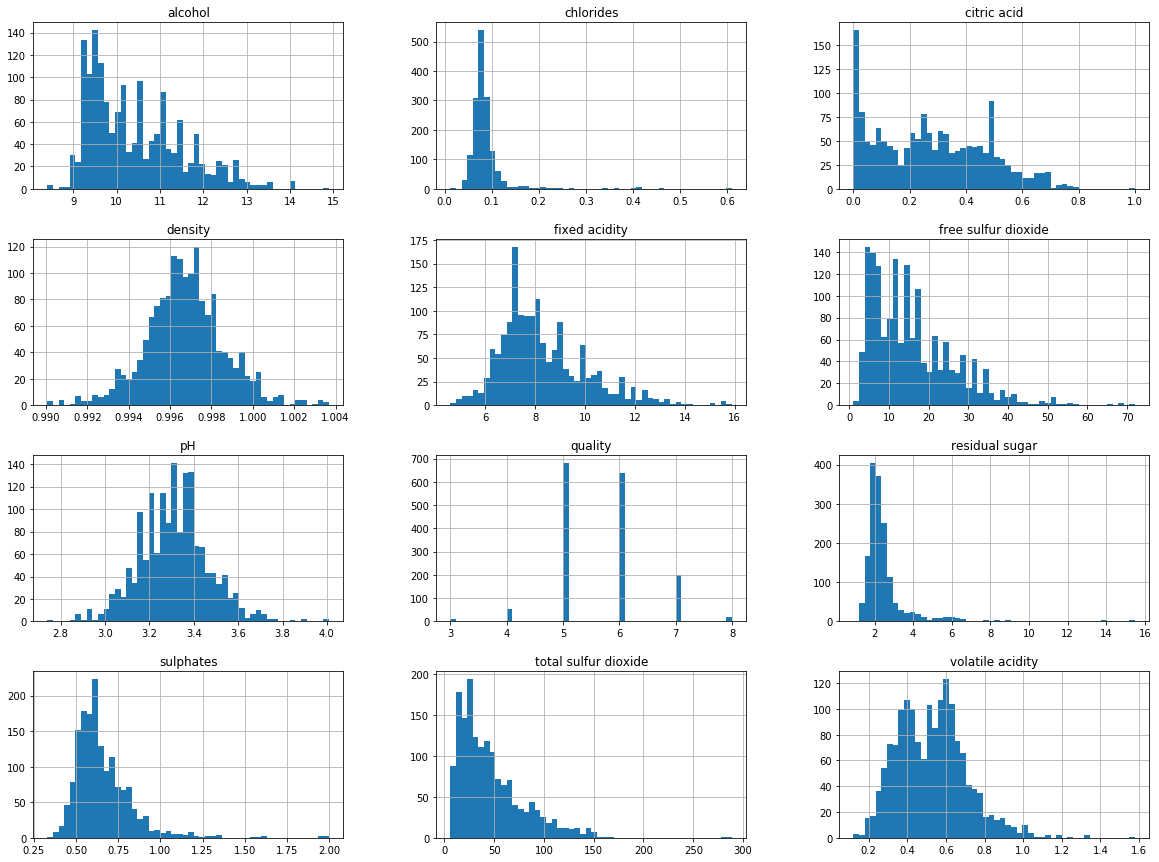

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
wine_data.hist(bins=50,figsize=(20,15))
plt.show()

Let's look at correlation between data and wine quality:

In [59]:
corr_matrix = wine_data.corr()

In [60]:
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

Let's do it in a graphic way:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115337978>,
      dtype=object)

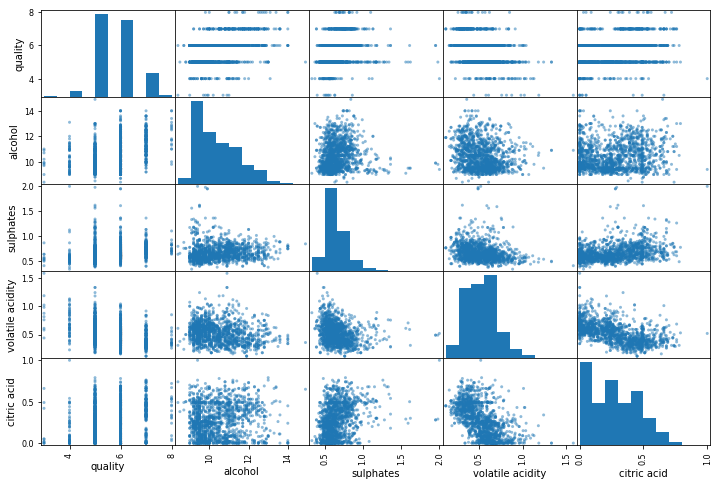

In [61]:
from pandas.plotting import scatter_matrix
attributes = ["quality","alcohol","sulphates","volatile acidity","citric acid"]
scatter_matrix(wine_data[attributes],figsize=(12,8))

Ok, let's imagine there is no need to create structured traning and test set.

Now, let's shuffle the data a bit and create a 20% test data:

In [62]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(wine_data, test_size=0.2, random_state=42)

In [63]:
test_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6,6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5,5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9,6
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8,5
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6,6


# Prepare data for machine learning

Let's separate the labels and the data from the train set 

In [64]:
train_data_wine = train_set.drop("quality",axis=1)
train_label_wine = train_set["quality"].copy()

Use a pipeline to scale the data, this will be the only operation we will do on data:

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

wine_data_scaled = num_pipeline.fit_transform(train_data_wine)

In [66]:
wine_data_scaled

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

In [67]:
wine_data_scaled.shape

(1279, 11)

In [68]:
train_label_wine.shape

(1279,)

# Now training !

Let's start with a regression, a decision tree,a random forest, and finally SVM.

In [69]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(wine_data_scaled, train_label_wine)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
# let's try the full pipeline on a few training instances
some_data = train_data_wine.iloc[:5]
some_labels = train_label_wine.iloc[:5]
some_data_prepared = num_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [5.68864364 6.05664943 5.69269687 5.11164627 4.79907142]


In [71]:
print("Labels:", list(some_labels))

Labels: [6, 6, 6, 5, 5]


Check the RMSE and MAE:

In [72]:
from sklearn.metrics import mean_squared_error

wine_predictions = lin_reg.predict(wine_data_scaled)
lin_mse = mean_squared_error(train_label_wine, wine_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.6512995910592837

We differ from + or - 0.65 for each predictions in terms of quality. Pretty good actually...

In [73]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(train_label_wine, wine_predictions)
lin_mae

0.49961964114857976

Now le'ts try a decision tree

In [74]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(wine_data_scaled, train_label_wine)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [76]:
wine_predictions = tree_reg.predict(wine_data_scaled)
tree_mse = mean_squared_error(train_label_wine, wine_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Woah! no Error! seems an overfit! Let's use cross validation before touching the test data set.

# Cross validation

In [78]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, wine_data_scaled, train_label_wine,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [79]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.77055175 0.8149003  0.82443162 0.63737744 0.82443162 0.87052427
 0.73950997 0.78561282 0.64347688 0.86488814]
Mean: 0.7775704817931988
Standard deviation: 0.07826107238079566


Cross val score divide the train dataset in 10 (cv=10), then it takes 9 blocks of data, train it and validate with the 1Oth block. The process is done 10 times, that is why there are 10 numbers in scores array. Finally DecisionTree is not that good, still quite accurate, we predict a quality score difference of 0.739 +/-0.078 in average.

Let compare the results with the linear regression:

In [81]:
lin_scores = cross_val_score(lin_reg, wine_data_scaled, train_label_wine,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.62576397 0.71661737 0.69198217 0.70092111 0.67935552 0.67375579
 0.66745333 0.67890987 0.49594792 0.64828114]
Mean: 0.6578988186927085
Standard deviation: 0.05921004161564624


Linear regression seems better: quality score difference of 0.657 +/-0.059 in average. Now time to try random forest.

In [83]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(wine_data_scaled, train_label_wine)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [85]:
wine_predictions_RF = forest_reg.predict(wine_data_scaled)
forest_mse = mean_squared_error(train_label_wine, wine_predictions_RF)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.24474141066084334

In [86]:
forest_scores = cross_val_score(forest_reg, wine_data_scaled, train_label_wine,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.63047601 0.69338391 0.67696473 0.57777861 0.60259854 0.67116969
 0.56540914 0.67840576 0.45328661 0.60659109]
Mean: 0.615606410364593
Standard deviation: 0.06900379053770475


Random forest seems better. quality score difference of 0.615 +/-0.069 in average. Last model SVM:

In [91]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(wine_data_scaled, train_label_wine)
wine_predictions_SVM = svm_reg.predict(wine_data_scaled)
svm_mse = mean_squared_error(train_label_wine, wine_predictions_SVM)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.6566986702591645

In [92]:
SVM_scores = cross_val_score(svm_reg, wine_data_scaled, train_label_wine,
                                scoring="neg_mean_squared_error", cv=10)
SVM_rmse_scores = np.sqrt(-SVM_scores)
display_scores(SVM_rmse_scores)

Scores: [0.63873129 0.72717675 0.68801801 0.69974646 0.69927149 0.68885734
 0.66080038 0.67509594 0.48820772 0.64468623]
Mean: 0.6610591621734614
Standard deviation: 0.0629835454135585


0.66 +/-0.06 SVM does not do better. We finally pick random forest, and will improve its hyperparameters.

# Adjust model with gridsearch and Randomizedsearch

In [98]:
from sklearn.model_selection import GridSearchCV
param_grid = [
        {'n_estimators': [3,10,30], 'max_features':[2,4,6,8]},
        {'bootstrap': [False] , 'n_estimators':[3,10], 'max_features':[2,3,4]},
          ]

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
forest_reg= RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(wine_data_scaled, train_label_wine)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

The model was trained first with 3x4 = 12 combinations (1st lines) and 2x3=6 (2nd line) , that 18 in total. As cv=5 (cross validation), in total there will be 18x5=90 trains.

In [100]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

This is the best features. As n_estimators is max, we may need to increase it..

Now let's try with randomgrid to improve hyperparameters values.

In [101]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(wine_data_scaled, train_label_wine)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1144cabe0>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x114fa97f0>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [103]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.6039555885315281 {'max_features': 7, 'n_estimators': 180}
0.6149923738079118 {'max_features': 5, 'n_estimators': 15}
0.6045935499175759 {'max_features': 3, 'n_estimators': 72}
0.6120211136673688 {'max_features': 5, 'n_estimators': 21}
0.6034882913335529 {'max_features': 7, 'n_estimators': 122}
0.6046644624530139 {'max_features': 3, 'n_estimators': 75}
0.6045597368310518 {'max_features': 3, 'n_estimators': 88}
0.603526255086369 {'max_features': 5, 'n_estimators': 100}
0.603495191371204 {'max_features': 3, 'n_estimators': 150}
0.7268716909076886 {'max_features': 5, 'n_estimators': 2}


In [108]:
test_data_wine = test_set.drop("quality",axis=1)
test_label_wine = test_set["quality"].copy()
wine_dataTest_scaled = num_pipeline.fit_transform(test_data_wine)


final_model = grid_search.best_estimator_

final_predictions = final_model.predict(wine_dataTest_scaled)

final_mse = mean_squared_error(test_label_wine, final_predictions)
final_rmse = np.sqrt(final_mse)

In [106]:
final_rmse

0.23722141299590147

O.23 difference in terms of quality between prediction and reality.

In [109]:
Results = pd.DataFrame(test_label_wine)
Results["Final_Predictions"] = final_predictions
Results.head(10)



,quality,Final_Predictions
803,6,5.200000
124,5,5.100000
350,6,5.366667
682,5,5.000000
1326,6,6.000000
976,5,5.066667
1493,5,5.166667
706,5,4.900000
613,5,6.200000
1587,6,6.100000
